In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re, sys

# sklearn stuff
from sklearn.decomposition import PCA

# scipy stuff
from scipy.interpolate import interp1d

# my stuff
from preprocessingTR import *

%matplotlib inline

In [2]:
base = './Data/'

In [3]:
u_dict = generate_udict(base)

# Trials

In [13]:
frank = get_data(51, 1)

In [44]:
totalfrank = pd.read_csv('./Data/processed/52_X.csv', index_col=0)

In [14]:
accelerometer_cols = [x for x in frank.columns if 'data' in x]
# gyroscope_cols = [x for x in a.columns if 'gyr' in x]

In [15]:
data = rot_trans(frank[accelerometer_cols].values)
acc_mag = (data ** 2).sum(axis=1) ** 0.5

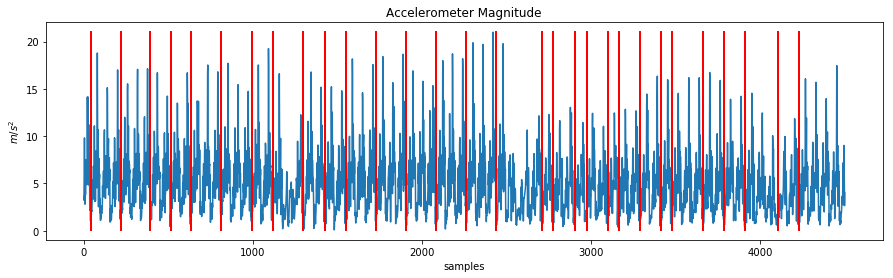

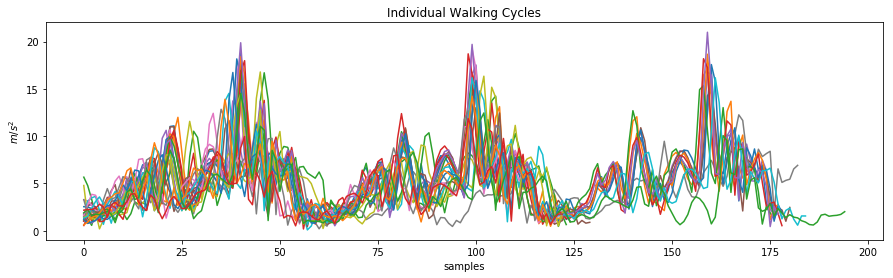

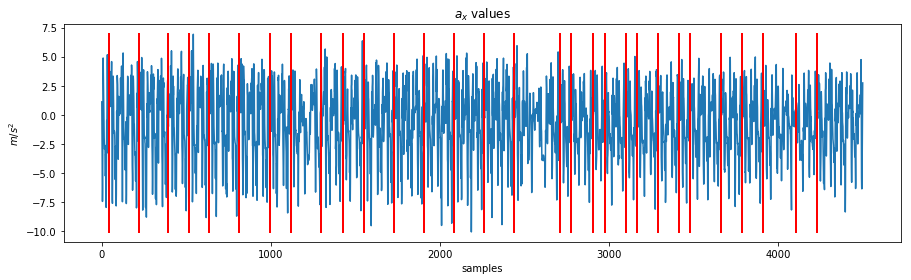

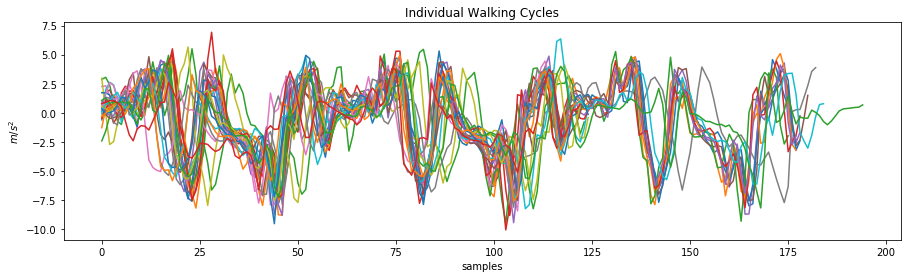

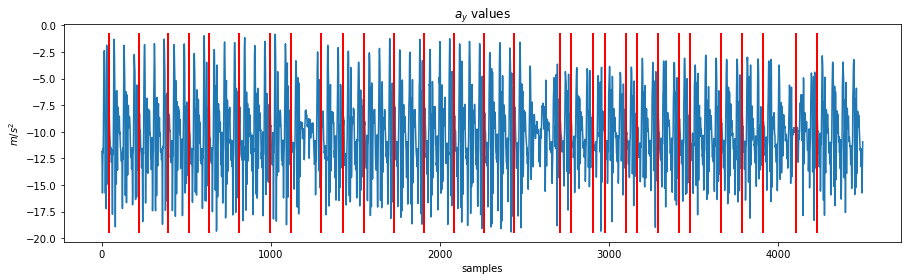

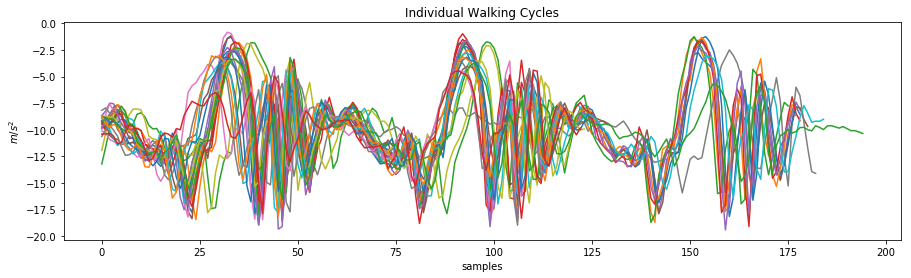

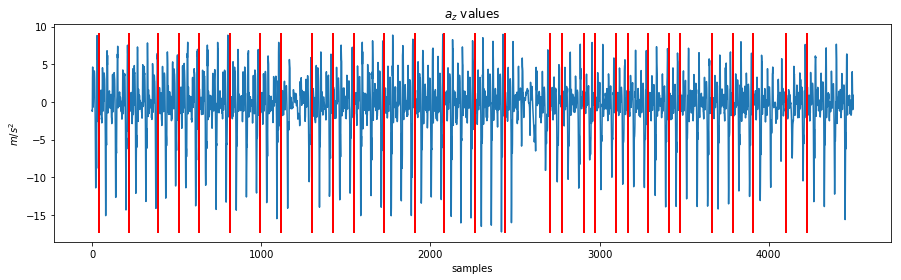

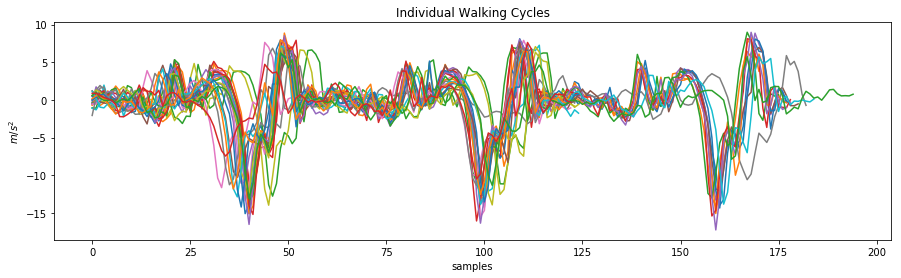

In [46]:
samples2 = acc_mag[500:5000]
starts = find_cycles(samples2)
starts2 = merge_consecutive_starts(starts, 3)
plot_steps(samples2, starts2)

x,y,z=frank[accelerometer_cols].values[500:5000, :].T
plot_steps(x, starts2, main_title='$a_x$ values')
plot_steps(y, starts2, main_title='$a_y$ values')
plot_steps(z, starts2, main_title='$a_z$ values')

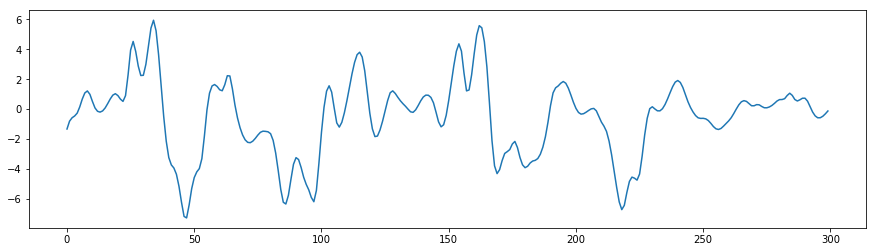

In [31]:
feats = extract_feats(x, starts2, filter_short=True)
feats_interp = interpolate_features(feats)
plt.figure(figsize=(15,4))
for row in feats_interp:
    plt.plot(row)

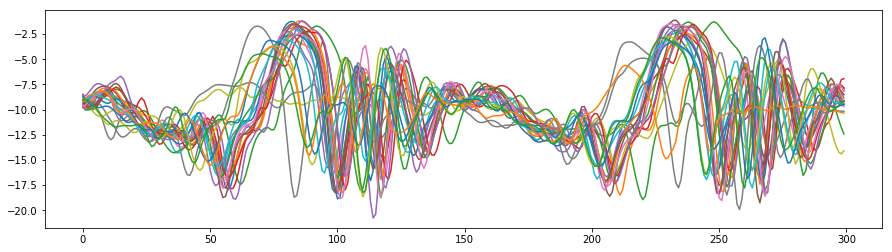

In [23]:
feats = extract_feats(y, starts2, filter_short=True)
feats_interp = interpolate_features(feats)
plt.figure(figsize=(15,4))
for row in feats_interp:
    plt.plot(row)

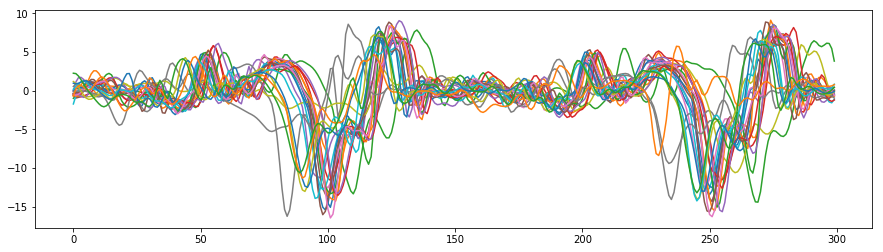

In [24]:
feats = extract_feats(z, starts2, filter_short=True)
feats_interp = interpolate_features(feats)
plt.figure(figsize=(15,4))
for row in feats_interp:
    plt.plot(row)

# Preprocess and save data

In [45]:
preprocess_and_save(u_dict, dir_name='./Data/processed/')

Files for user 1 exist on disk.
Files for user 2 exist on disk.
Files for user 3 exist on disk.
Files for user 4 exist on disk.
Processing user 5, trial 1, 135 remaining


/home/ubicomp/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubicomp/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


FAILED
Files for user 6 exist on disk.
Files for user 7 exist on disk.
Files for user 8 exist on disk.
Files for user 9 exist on disk.
Files for user 10 exist on disk.
Files for user 11 exist on disk.
Files for user 12 exist on disk.
Files for user 13 exist on disk.
Files for user 14 exist on disk.
Files for user 15 exist on disk.
Files for user 16 exist on disk.
Files for user 17 exist on disk.
Files for user 18 exist on disk.
Files for user 19 exist on disk.
Files for user 20 exist on disk.
Files for user 21 exist on disk.
Files for user 22 exist on disk.
Files for user 23 exist on disk.
Files for user 24 exist on disk.
Files for user 25 exist on disk.
Files for user 26 exist on disk.
Files for user 27 exist on disk.
Files for user 28 exist on disk.
Files for user 29 exist on disk.
Files for user 30 exist on disk.
Files for user 31 exist on disk.
Files for user 32 exist on disk.
Files for user 33 exist on disk.
Files for user 34 exist on disk.
Files for user 35 exist on disk.
Files f

In [49]:
merge_incremental(base='./Data/processed/')

Nothing to merge


In [47]:
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GTX 1060 6GB (0000:01:00.0)
